<a href="https://colab.research.google.com/github/AaronOnserio/APIs/blob/master/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative Filtering

Collaborative Filtering stands as the prevailing approach utilized in the construction of intelligent recommendation systems, enabling them to enhance their recommendations as they gather more user information.

Collaborative Filtering is a widely employed technique in advanced recommendation systems, employed by prominent platforms such as Amazon, YouTube, and Netflix. It allows the development of recommenders that suggest items to users based on the preferences and dispositions of similar users.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import zipfile
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

## Objectives 

## What is Collaborative Filtering?

Collaborative filtering is a technique used in recommendation systems to provide personalized recommendations to users based on their preferences and behaviors. It assumes that users who have similar tastes and preferences in the past will have similar tastes in the future. 

Involves searching through a large user group to identify a subset of users who share similar tastes with a specific user. It examines the items they have show interest in and combines this information to generate a ranked list of recommendations.

### Types of Collaborative Filtering:

1. **User-Based Collaborative filtering**: - This method recommends items to a user based on the preferences of users who are similar to them. It identifies users who have similar ratings or behavior and suggests items that these similar users have liked or interacted with.

2. **Item-based Collaborative filtering**: - This approach recommends items to a user based on the similarity between items themselves. It analyzes the ratings and interactions of users with different items and identifies items that are frequently liked or interacted with by users who have also liked or interacted with the target item.

Both rely on collecting and analyzing large amounts of data about user preferences, such as ratings,reviews, or purchase history to generate accurate recommendations.

## Data 

In order to conduct experiments with recommendation algorithms, it is necessary to have a dataset that includes a **collection of items** and a **group of users** who have **interacted** with some of those items. 

1. **User Data**: - Recommendation systems rely on user information to understand their preference and behaviors. This can include data such as user profiles, demographic information, past interactions, ratings, reviews, purchase history, and explicit feedback e.g, likes and dislikes.
2. **Item Data**: - Information about the items being recommended is crucial. This can include attributes such as items descriptions, metadata, categories, genres, release dates, popularity, and any relevant features specific to the domain e.g, artist for music, director for movies.
3. **interaction data**: - Tracking user interactions with items is essential for collaborative filtering and other recommendation techniques. The user reactions in a recommendation dataset can be categorized into two types:
>>* **Explicit Reactions**: - User feedback that is directly provided and indicates a clear preference or rating for an item. This can include ratings given on a scale e.g., 1 to 5 stars, likes or dislikes (thumbs up or thumbs down) or any other explicit indication of user preference for an item.
>>* **Implicit Reactions**: - Involve user behaviors or actions that indirectly reflect their preference without explicit feedback. These reactions are derived from user interactions with the items or the system itself. Examples including viewing an item, adding it to a wish list, saving it for later, spending a significant amount of item reading an article or watching a video, or any other user activity that suggests interest or engagement with the item. 

<details>
<summary> 📝 </summary>
Implicit reactions are inferred from user actions rather than being directly provided by the user. These actions may be tracked and recorded by the recommendation system to capture user preferences and behavior patterns.
</details>

Other important considerations:

4. **Contextual Data**: - Consider incorporating contextual data to enhance recommendations. This can include temporal information such as time of day, day of the week, geographic data, device information, and other relevant contextual factors.
5. **Social Data**: - Incorporating social data can provide additional insights into user preferences. This includes information about a user's social network, social connections, and influence among peers.
6 **Additional data sources**: - Depending on the domain and specific requirements, there may be additional data sources to consider e.g., in e-commerce, product attributes, inventory levels, pricing data, and promotional information may be relevant.

When dealing with data in the context of recommendation systems, it is common to encounter it in the form of a matrix. This matrix represents the reactions provided by a group of users to a set of items. The structure of this matrix is as follows:

1. **Rows**: - Each row in the matrix corresponds to a specific user. It represents the ratings or reactions given by that user to the various items in the dataset. 
2. **Columns**: - Each column in the matrix corresponds to a specific item. It represents the ratings or rections received by that item from different users.


>>>>
|       |${i_1}$|${i_2}$|${i_3}$|${i_4}$|${i_5}$|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|${u_1}$|4      |5      |       |3      |       |
|${u_2}$|       |3      |4      |4      |       |
|${u_3}$|       |4      |       |4      |4      |
|${u_4}$|4      |5      |4      |       |       |
|${u_5}$|5      |4      |3      |4      |2      |

The matrix above represents:
* Rows represent users, denoted as ${u_1}$, ${u_2}$, ${u_3}$, ${u_4}$, and ${u_5}$.
* Columns represent items, denoted as ${i_1}$, ${i_2}$, ${i_3}$, ${i_4}$, and ${i_5}$.
* Cells in the matrix indicate the reactions or ratings given by users to the corresponding items.
* Blank cells indicate that the user did not provide a rating or reaction for that particular item.

It is common for the user-item interaction matrix to have most empty cells. This sparsity occurs because users typically rate or react to only a subset of the available items. As a result the matrix is considered **sparse**. 

A sparse matrix is characterized by a significant number of empty or missing values compared to the total number of possible entries in the matrix. The sparsity arises due to inherent nature of user-item interactions, where users have limited interactions with a vast number of items.

Handling sparsity is a common challenge in recommendation systems. Various techniques such as ```matrix factorization```, ```neighborhood-based methods```, or ```advanced machine learning algorithms``` are employed to effectively generate recommendations despite the sparse nature of the user-item matrix. These techniques aim to predict or estimate missing ratings or reactions and provide personalized recommendations even when explicit data is missing for many user-item pairs. 

A **dense** matrix refers to a matrix rare in practice, as it would require every user to rate or react to every item, which is highly unlikely.


## Loading the data

In [ ]:
# uzip the archive.zip file 
with zipfile.ZipFile('/content/drive/MyDrive/Live Sessions/lectures/Phase 4/Recommendation System /Collaborative Filtering/archive.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive/Live Sessions/lectures/Phase 4/Recommendation System /Collaborative Filtering/data')


In [ ]:
# load movies data 
movies = pd.read_csv('/content/drive/MyDrive/Live Sessions/lectures/Phase 4/Recommendation System /Collaborative Filtering/data/movies.csv')
movies.head()

,MovieId,ReleaseYear,MovieTitle
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
# load ratings data 
ratings = pd.read_csv('/content/drive/MyDrive/Live Sessions/lectures/Phase 4/Recommendation System /Collaborative Filtering/data/Netflix_User_Ratings.csv')
ratings.head()

,CustId,Rating,Date,MovieId
0,1488844,3,2005-09-06,1
1,822109,5,2005-05-13,1
2,885013,4,2005-10-19,1
3,30878,4,2005-12-26,1
4,823519,3,2004-05-03,1


## Understanding the Data

In [ ]:
# understanding the data 
def explicit_reactions(data, column):
  """different reactions provided by different users"""
  out = data[column].value_counts()

  return out

def missing_values(data):
  """Missing values"""
  if (data.isnull().any().any() == False):
    out = print(f"The data has no missing values.")
  else:
    miss = data.isnull().sum().sort_values(ascending=False)
    percentage_miss = ((data.isnull().sum()/len(data)).sort_values(ascending=False))
    out = pd.DataFrame({'Missing': miss, "Percentage(%)": percentage_miss}, index=miss.index)
    # remove values that are missing 
    out.drop(out[out["Percentage(%)"] == 0].index, inplace = True)

  return out 



In [ ]:
ratings.shape

(100480507, 4)

In [ ]:
movies.shape

(17770, 3)

In [ ]:
# explicit user reactions 
explicit_reactions(ratings, "Rating")

4    33750958
3    28811247
5    23168232
2    10132080
1     4617990
Name: Rating, dtype: int64

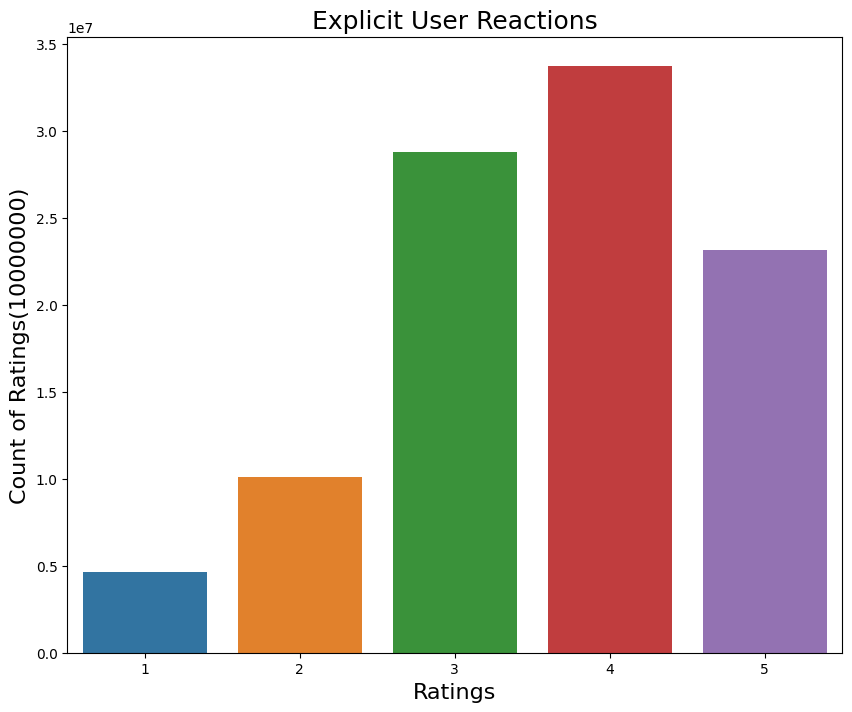

In [ ]:
# visualize 
fig, ax = plt.subplots(figsize=(10,8))
user_reactions = explicit_reactions(ratings, "Rating")
sns.barplot(x=user_reactions.index, y=user_reactions.values, ax=ax)
ax.set_ylabel("Count of Ratings(10000000)", fontsize=16)
ax.set_xlabel("Ratings", fontsize=16)
ax.set_title("Explicit User Reactions", fontsize=18)

plt.show()

fig.savefig('/content/drive/MyDrive/Live Sessions/lectures/Phase 4/Recommendation System /Collaborative Filtering/images/ratings.png')

In [ ]:
# missing data in movies 
missing_values(movies)

,Missing,Percentage(%)
ReleaseYear,7,0.000394


In [ ]:
# missing data in ratings 
missing_values(ratings)

The data has no missing values.


## Data Preparation

Represent the data as a user-item matrix, where each row corresponds to a user, each column corresponds to an item, and the cells contain the ratings(interactions). By organizing the user-item interactions in a matrix format, collaborative filtering algorithms can analyze the patterns, similarities, and relationships between users and items.

You can use pandas ```pivot_table()``` function of the ```groupby()``` function in combination with other operations to reshape the data into the desired matrix format

In [ ]:
# Set the random seed for reproducibility
random_seed = 42

# Shuffle the ratings DataFrame
ratings_shuffled = ratings.sample(frac=1, random_state=random_seed)

# Split the shuffled DataFrame into five samples
num_samples = 5
sample_size = len(ratings_shuffled) // num_samples

# Create an empty list to store the samples
samples = []

# Iterate over the number of samples
for i in range(num_samples):
    # Select a subset of the shuffled DataFrame
    sample = ratings_shuffled[i * sample_size : (i + 1) * sample_size].copy()
    
    # Append the sample to the list of samples
    samples.append(sample)

# Print the first few rows of each sample
for i, sample in enumerate(samples):
    print(f"Sample {i+1}:")
    print(sample.head())
    print()


NameError: ignored

In [ ]:
# store the samples as CSV files 
def store_samples(sample, path, name):
  """Store samples as CSV files"""
  data = sample.to_csv(f"{path}/{name}")


store_samples(samples[0], '/content/drive/MyDrive/Live Sessions/lectures/Phase 4/Recommendation System /Collaborative Filtering/data', 'sample1')

NameError: ignored

In [ ]:
# load the sample 
df = pd.read_csv('/content/drive/MyDrive/Live Sessions/lectures/Phase 4/Recommendation System /Collaborative Filtering/data/sample1')
df.head()

,Unnamed: 0,CustId,Rating,Date,MovieId
0,87800315,404578,4,2005-10-26,15582
1,36770798,636396,4,2004-08-05,6510
2,87357564,2258880,4,2005-06-15,15500
3,81468281,1574865,2,2004-08-26,14621
4,21872551,237063,4,2004-01-26,4123


In [ ]:
# drop the unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# pick a sample of 100000
sample = df.sample(n=50000, random_state=42)

sample.head()

,CustId,Rating,Date,MovieId
14944749,290740,4,2005-11-05,11121
1025657,1057555,4,2005-09-17,257
15593216,2627515,5,2005-06-20,7780
7359988,357285,3,2005-11-15,17295
18188283,534794,5,2004-09-09,15425


In [ ]:
# create the user-item matrix
user_item_matrix = sample.pivot_table(index='CustId', columns='MovieId', values='Rating')

# preview the table
user_item_matrix.head()

MovieId,3,5,8,17,18,26,27,28,30,33,...,17745,17748,17751,17756,17758,17760,17762,17764,17766,17769
CustId,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_item_matrix.isnull().sum().sum()

313796180

In [ ]:
user_item_matrix.notnull().sum().sum()

50000

The above results indicate that there are a large number of missing values. Having a significant number of missing values can affect the accuracy and performance of your recommendation system as missing values can introduce biases and impact the similarity calculations and recommendation generation process. 

* **Use Sparse Matrix Representation**: Instead of converting the user-item matrix to a dense matrix, you can utilize sparse matrix representations. Sparse matrices store only non-zero values, reducing memory usage and computational overhead. Libraries like SciPy provide efficient data structures for working with sparse matrices.

In [ ]:
# create a mapping from unique customer IDs and Movie IDs to indices
customer_ids = sample['CustId'].unique()
customer_id_to_index = {id: index for index, id in enumerate(customer_ids)}

movie_ids = sample['MovieId'].unique()
movie_id_to_index = {id: index for index, id in enumerate(movie_ids)}

# get the indices for the sparse matrix
row_indices = np.array([customer_id_to_index[id] for id in sample['CustId']])
col_indices = np.array([movie_id_to_index[id] for id in sample['MovieId']])
ratings = np.array(sample['Rating'])

# create the sparse matrix
sparse_matrix = csr_matrix((ratings, (row_indices, col_indices)), shape=(len(customer_ids), len(movie_ids)))

## Questions

1. How is the similarity between users or items determmined in collaborative filtering?
2. Once you have identified similar users, how do you predict the rating that a user would give to an item based on the ratings of those similar users?
3. How is the accuracy of the calculated ratings measured in collaborative filtering?

## Types of Algorithms to Build collaborative filtering recommender systems 

There are basically four type of algorithms (techniques) to build collaborative filtering based recommender systems.


### 1. Memory-Based Collaborative filtering

Memory-based algorithms directly use the user-item interaction data to compute similarities between users or items. These algorithms include **User-Based Collaborative Filtering** (UBCF) and **Item-Based Collaborative Filtering** (IBCF). UBCF computes similarities between users based on their ratings and recommends items liked by similar users. IBCF, on the other hand, computes similarities between items and recommends similar items to those a user has interacted with.

#### How does it work?

The aim is to predict the rating that a user **U** would give an item **I**, and the algorithm follows the following steps:

<ul>
<li>Finding the users similar to U who have rated to item I:</li>
<p> The algorithm searches for users who have similar rating patterns to user U and have also rated item I. The similarity between users can be determined using various similarity measures such as cosine similarity or Pearson correlation.</p>
<li> Calculating the rating R based on the ratings of similar users</li>
<p>Once similar users who have rated item I are identified, the algorithm combines their ratings to estimate the ratings R that user U would give to item I. This can be done through techniques such as weighted averaging, where the ratings of similar users are weighted based on their similarity to user U. The weights can be determined using the similarity scores.

In [ ]:
# similarity calculation  using cosine similarity 
user_similarities = cosine_similarity(sparse_matrix)

* The resulting ```user_similarities``` matrix will have dimensions (num_users, num_users)
* Each element [i, j] represents the similarity between user i and user j


In [ ]:
# Example 
target_user_index = 0  # Index of the target user

# Get the similarities of the target user with other users
similarities_with_target_user = user_similarities[target_user_index]

# Print the similarities of the target user with other users
print(similarities_with_target_user)

[1. 0. 0. ... 0. 0. 0.]


Similarity score ranges from 0 to 1, where 0 indicates no similarity and 1 indicates maximum similarity. 

#### Calculate the predicted rating for a target user (or item) based on the ratings of those similar users.
One common approach is to use weighted averages or weighted sums of the ratings provided by similar users. The idea is to give more weight to the ratings of users who are more similar to the target user.

Here's a general outline of the steps involved in calculating the predicted rating R for a target user:

1. Identify a set of similar users to the target user based on some similarity measure (e.g., cosine similarity).
2. Retrieve the ratings of those similar users for the item of interest.
3. Assign weights to the ratings of the similar users, where the weights reflect their similarity to the target user.
4. Calculate the predicted rating R by taking a weighted average or weighted sum of the ratings, using the weights obtained in the previous step.

In [ ]:
# Index of the target user
target_user_index = 0 
 
# Number of similar users to consider
k = 100  

# Sort the similarity scores in descending order and get the indices of the top k similar users
similar_users_indices = np.argsort(user_similarities[target_user_index])[::-1][:k]

# Print the indices of similar users
print(similar_users_indices)

[    0  8038 24814  2879 14487 14494 14493 14492 14491 14490 14489 14488
 14486 14485 14484 14483 14482 14481 14480 14479 14478 14495 14496 14476
 14507 14515 14514 14513 14512 14511 14510 14509 14508 14506 14497 14505
 14504 14503 14502 14501 14500 14499 14498 14477 14475 14517 14454 14452
 14451 14450 14449 14448 14447 14446 14445 14444 14443 14442 14441 14440
 14439 14438 14437 14436 14453 14455 14474 14456 14473 14472 14471 14470
 14469 14468 14467 14466 14465 14464 14463 14462 14461 14460 14459 14458
 14457 14516 14518 14434 14571 14579 14578 14577 14576 14575 14574 14573
 14572 14570 14519 14569]


In [ ]:
# Retrieve the IDs of similar users
similar_users_ids = [customer_ids[index] for index in similar_users_indices]

# Print the IDs of similar users
print(similar_users_ids)

[290740, 102706, 771641, 1801373, 1124396, 2428223, 151666, 56349, 762423, 1518179, 1589357, 361630, 1823627, 2592591, 123737, 2187498, 2015312, 1568715, 782571, 2277086, 929377, 1551848, 863081, 2017088, 389219, 24946, 1812060, 165653, 20040, 1913820, 1622041, 2043617, 610174, 1509735, 1518269, 760570, 2128119, 813594, 1723162, 727010, 1684478, 2159363, 1279601, 126913, 482433, 2519294, 648585, 1137944, 1431879, 206844, 2441398, 1812261, 2229453, 1961109, 1161417, 1349773, 425581, 2490772, 470999, 2051892, 1526618, 2355363, 898161, 2449648, 176392, 357522, 2505656, 440983, 2439223, 2090127, 2110330, 276678, 1479892, 1514136, 1149786, 2010093, 1062070, 2341465, 2451203, 2011398, 1580437, 2070371, 1159919, 1628608, 1306734, 1892671, 504620, 2541384, 2247237, 1301223, 881562, 2228502, 413982, 936113, 1898882, 2322355, 2127998, 1710338, 1389451, 458562]


In [ ]:
print(movie_ids)

[11121   257  7780 ...  6201 10696  5757]


In [ ]:
item_id = 11121  # Item ID of interest (e.g., movie ID)

# Check if the item ID exists in the dictionary
if item_id in movie_id_to_index:
    # Get the index of the item
    item_index = movie_id_to_index[item_id]

    # Retrieve the ratings of similar users for the item of interest
    item_ratings = []
    for user_index in similar_users_indices:
        if sparse_matrix[user_index, item_index] != 0:
            item_ratings.append(sparse_matrix[user_index, item_index])

    # Print the ratings of similar users for the item
    if item_ratings:
        print(item_ratings)
    else:
        print("No ratings found for the item.")
else:
    print("Item ID not found in the dictionary.")

[4, 4, 4, 5]


In [ ]:
item_id = 11121  

# Check if the item ID exists in the dictionary
if item_id in movie_id_to_index:
    # Get the index of the item
    item_index = movie_id_to_index[item_id]

    # Retrieve the ratings of similar users for the item of interest
    weighted_ratings = []
    for user_index in similar_users_indices:
        if sparse_matrix[user_index, item_index] != 0:
            similarity = user_similarities[target_user_index, user_index]
            rating = sparse_matrix[user_index, item_index]
            weighted_rating = rating * similarity
            weighted_ratings.append(weighted_rating)

    # Print the ratings of similar users for the item
    if weighted_rating:
        print(weighted_ratings)
    else:
        print("No ratings found for the item.")
else:
    print("Item ID not found in the dictionary.")

[4.0, 4.0, 4.0, 2.8867513459481287]


In [ ]:
item_id = 11121  # Item ID of interest (e.g., movie ID)

# Check if the item ID exists in the dictionary
if item_id in movie_id_to_index:
    # Get the index of the item
    item_index = movie_id_to_index[item_id]

    # Retrieve the ratings of similar users for the item of interest
    weighted_ratings = []
    total_similarity = 0  # Variable to keep track of the total similarity

    for user_index in similar_users_indices:
        if sparse_matrix[user_index, item_index] != 0:
            similarity = user_similarities[target_user_index, user_index]
            rating = sparse_matrix[user_index, item_index]
            weighted_rating = rating * similarity
            weighted_ratings.append(weighted_rating)
            total_similarity += similarity

    # Calculate the predicted rating by taking the weighted average
    if weighted_ratings:
        predicted_rating = sum(weighted_ratings) / total_similarity
        print("Predicted rating:", predicted_rating)
    else:
        print("No ratings found for the item.")
else:
    print("Item ID not found in the dictionary.")


Predicted rating: 4.1613904777964095
